<a href="https://colab.research.google.com/github/CuongLeManh02/Learning-content/blob/main/identify_Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Database/Rice/

/content/drive/MyDrive/Colab Notebooks/Database/Rice


In [4]:
train_img=('/content/drive/MyDrive/Colab Notebooks/Database/Rice/Train')

In [5]:
valid_img=('/content/drive/MyDrive/Colab Notebooks/Database/Rice/Valid')

In [6]:
train_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [7]:
valid_dg=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [9]:
train_rice= train_dg.flow_from_directory(train_img,target_size=(200,200),class_mode='categorical')
valid_rice= valid_dg.flow_from_directory(valid_img,target_size=(200,200),class_mode='categorical')

Found 500 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [10]:
x_train,y_train=next(train_rice)

In [13]:
x_train.shape

(32, 200, 200, 3)

In [12]:
y_train.shape

(32, 5)

In [11]:
train_rice.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [14]:
label=['Arborio', 'Basmati', 'Ipsala', 'Jasmine','Karacadag']

In [16]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 128)     

In [20]:
model.compile(optimizer='Adam',loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_rice,epochs=100,batch_size=128,verbose=1, validation_data=valid_rice)

Epoch 1/100
16/16 [==============================] - 10s 611ms/step - loss: 0.5714 - accuracy: 0.7240 - val_loss: 2.7328 - val_accuracy: 0.7160
Epoch 2/100
16/16 [==============================] - 8s 520ms/step - loss: 0.4066 - accuracy: 0.7920 - val_loss: 2.6923 - val_accuracy: 0.6440
Epoch 3/100
16/16 [==============================] - 9s 585ms/step - loss: 0.3301 - accuracy: 0.7920 - val_loss: 2.1863 - val_accuracy: 0.7720
Epoch 4/100
16/16 [==============================] - 10s 668ms/step - loss: 0.3530 - accuracy: 0.7640 - val_loss: 3.0034 - val_accuracy: 0.6400
Epoch 5/100
16/16 [==============================] - 8s 503ms/step - loss: 0.3289 - accuracy: 0.7880 - val_loss: 2.2413 - val_accuracy: 0.7120
Epoch 6/100
16/16 [==============================] - 9s 590ms/step - loss: 0.3229 - accuracy: 0.7680 - val_loss: 3.1212 - val_accuracy: 0.6440
Epoch 7/100
16/16 [==============================] - 9s 597ms/step - loss: 0.2971 - accuracy: 0.7900 - val_loss: 2.8853 - val_accuracy: 0.68

In [21]:
model.save('identify Rice.h5')

In [22]:
metric = model.evaluate(x_train,y_train,verbose=2)
print('Loss:',metric[0])
print('Accuracy:',metric[1])

1/1 - 0s - loss: 0.3566 - accuracy: 0.6562 - 49ms/epoch - 49ms/step
Loss: 0.3566168248653412
Accuracy: 0.65625


1/1 [==============================] - 0s 18ms/step
[[4.7388408e-01 5.2590650e-01 3.2226661e-05 5.4040647e-06 1.7186576e-04]]
1/1 [==============================] - 0s 17ms/step
This is: Basmati


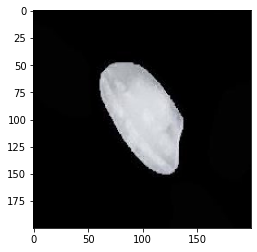

In [32]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Rice/Test/Arborio (151).jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 25ms/step
[[1.8441911e-09 2.7809910e-09 4.7675891e-10 1.0000000e+00 1.9708386e-15]]
1/1 [==============================] - 0s 20ms/step
This is: Jasmine


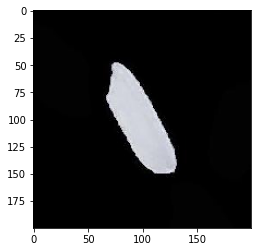

In [24]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Rice/Test/Jasmine (151).jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 19ms/step
[[3.4530873e-31 2.1737512e-31 1.0000000e+00 7.6571528e-31 9.3915602e-29]]
1/1 [==============================] - 0s 23ms/step
This is: Ipsala


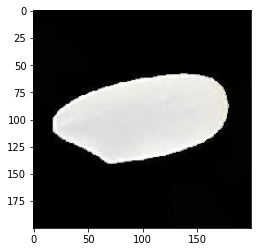

In [25]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Rice/Test/Ipsala (151).jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 17ms/step
[[6.3784806e-05 8.5111758e-05 4.2477112e-07 9.2654434e-10 9.9985063e-01]]
1/1 [==============================] - 0s 15ms/step
This is: Karacadag


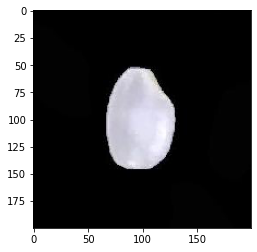

In [26]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Rice/Test/Karacadag (151).jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])

1/1 [==============================] - 0s 16ms/step
[[1.7927932e-22 9.5653260e-22 2.0490410e-17 1.0000000e+00 3.6272074e-31]]
1/1 [==============================] - 0s 18ms/step
This is: Jasmine


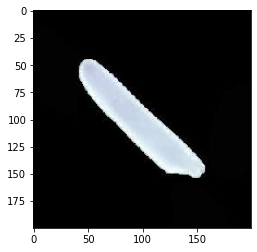

In [30]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Database/Rice/Test/basmati (151).jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("This is:", label[a])